
# Premier Project: Water Quality Prediction

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling/Cleaning</a></li>
<li><a href="#---">----------</a></li>
<li><a href="#---">----------</a></li>
<li><a href="#---">----------</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
> The dataset to investigate and make predictions on contains information about ............ Each column is described below:
    <ol>
    <li><strong>--</strong>: ----</li>
    <li><strong>--</strong>: ----</li>
    <li><strong>--</strong>: ----</li> 
    <li><strong>--</strong>: ----</li>
    <li><strong>--</strong>: ----</li>
    <li><strong>--</strong>: ----</li>
    <li><strong>--</strong>: ----</li>
    <li><strong>--</strong>: ----</li>
    <li><strong>--</strong>: ----</li>
    <li><strong>--</strong>: ----</li>
    <li><strong>--</strong>: ---- </li>
    <li><strong>--</strong>: ----</li>
    <li><strong>--</strong>: ----</li>
    </ol>


### Question(s) for Analysis



In [1]:
# import libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

<a id='wrangling'></a>
## Data Wrangling
> In this section, the dataset is loaded into a dataframe for analysis and modelling in the notebook with the pd.read_csv() function. Then few lines of the dataset is displayed with .head() function to make sure the data file was correctly read and also to get the idea of what the data looks like.


In [2]:
# load dataset into a dataframe
df = pd.read_csv('water_potability.csv')

In [3]:
# check if the dataset was read properly
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# check for the number of rows and columns in the dataframe
df.shape

(3276, 10)

In [5]:
# check for information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
# check for columns with null values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
# check for duplicates in the dataset
df.duplicated().sum()

0

### Data Cleaning

> The **data cleaning** will begin with checking and fixing the shape of dataset, duplicates, data types of the columns and finally dropping columns that are not needed for analysis and prediction.

#### Handling Missing Values

In [9]:
# create a function to handle the missing values in the dataset
def fill_missing(column):
    '''
    function to replace the missing values in the dataset with the mean values of the column
    -------------------PARAMETER--------------------------
   column: feature/variable containing the missing value
    '''
    return column.fillna(column.mean())

In [10]:
# list the columns with missing values
columns = ['ph', 'Sulfate', 'Trihalomethanes']
# iterate through the list fill null values in each item of the list
for col in columns:
    df[col] = fill_missing(df[col])
    

In [11]:
# test for the change
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
# check the statistical summary of the dataframe
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


- No duplicate is present
- missing values in the columns have been replaced with the mean of the values in the column
- All columns have a correct data type and there's no need for further conversions  

<a id='eda'></a>
## Exploratory Data Analysis 
> Now that the dataset has been wrangled and cleaned, let's begin the analysis of the dataset by first checking the visual summaries of the dataset using .hist() function and then finally exploring the questions posed at the <a href="#intro">Introduction</a>.


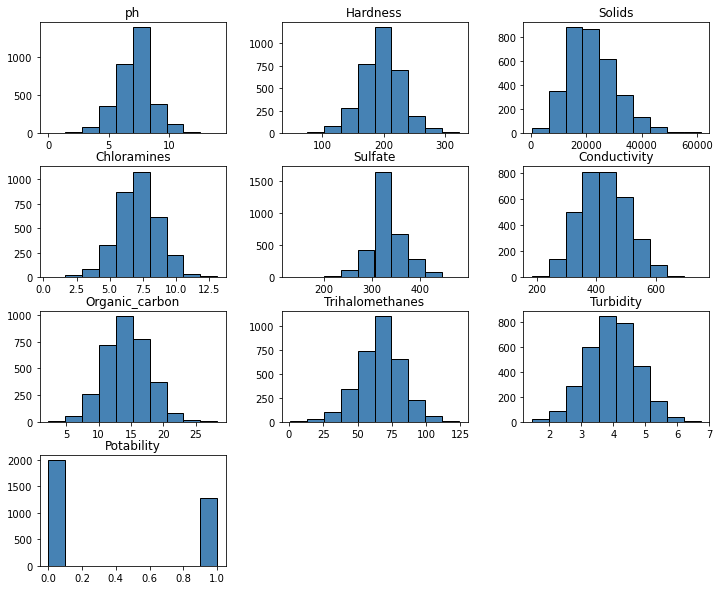

In [14]:
df.hist(grid = False, color = 'steelblue', edgecolor = 'black', figsize = (12,10));